<a href="https://colab.research.google.com/github/MariiaKhai/Dance_dance/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому прикладі ми використовуємо набір даних, що документують ціни на житло в районі Pacific Heights в Сан-Франциско, і використовуємо просту та множинну лінійні регресії, щоб передбачити, за якою ціною буде продавати житло з урахуванням кількості кімнат, площі та інших факторів.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('pacific-heights.csv')
df.head()

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zipcode
0,2243 Franklin St,2.0,2,1463,2/5/2016,1950000,37.795139,-122.425309,Pacific Heights,7,Condominium,1900,94109
1,2002 Pacific Ave APT 4,3.5,3,3291,1/22/2016,4200000,37.794429,-122.428513,Pacific Heights,7,Condominium,1961,94109
2,1945 Washington St APT 411,1.0,1,653,12/16/2015,665000,37.792472,-122.425281,Pacific Heights,3,Condominium,1987,94109
3,1896 Pacific Ave APT 802,2.5,2,2272,12/17/2014,2735000,37.794706,-122.426347,Pacific Heights,6,Condominium,1924,94109
4,1840 Washington St APT 603,1.0,1,837,12/2/2015,1050000,37.793212,-122.423744,Pacific Heights,3,Condominium,2012,94109


In [3]:
df.shape

(439, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        439 non-null    object 
 1   bathrooms      439 non-null    float64
 2   bedrooms       439 non-null    int64  
 3   finishedsqft   439 non-null    int64  
 4   lastsolddate   439 non-null    object 
 5   lastsoldprice  439 non-null    int64  
 6   latitude       439 non-null    float64
 7   longitude      439 non-null    float64
 8   neighborhood   439 non-null    object 
 9   totalrooms     439 non-null    int64  
 10  usecode        439 non-null    object 
 11  yearbuilt      439 non-null    int64  
 12  zipcode        439 non-null    int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 44.7+ KB


In [7]:
corr_matrix= df.corr()
corr_matrix
#corr_matrix['lastsoldprice'].sort_values(ascending=False)

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zipcode
bathrooms,1.000000,0.711805,0.866909,0.768179,0.094180,-0.248637,0.780811,-0.207322,0.230719
bedrooms,0.711805,1.000000,0.752464,0.606579,0.019174,-0.289700,0.781685,-0.312832,0.274226
finishedsqft,0.866909,0.752464,1.000000,0.840864,0.092464,-0.310202,0.870899,-0.299542,0.286176
lastsoldprice,0.768179,0.606579,0.840864,1.000000,0.126480,-0.309462,0.670726,-0.214365,0.296032
latitude,0.094180,0.019174,0.092464,0.126480,1.000000,0.506881,0.023381,0.084870,0.158759
longitude,-0.248637,-0.289700,-0.310202,-0.309462,0.506881,1.000000,-0.308421,0.334563,-0.437948
totalrooms,0.780811,0.781685,0.870899,0.670726,0.023381,-0.308421,1.000000,-0.364832,0.266272
yearbuilt,-0.207322,-0.312832,-0.299542,-0.214365,0.084870,0.334563,-0.364832,1.000000,-0.279990
zipcode,0.230719,0.274226,0.286176,0.296032,0.158759,-0.437948,0.266272,-0.279990,1.000000


бачимо лінійну кореляцію з наступними факторами 
finishedsqft,   bathrooms,   totalrooms,    bedrooms   

In [8]:
df = df[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode', 'zipcode', 'lastsoldprice']]
df = pd.get_dummies(df, columns=['usecode', 'zipcode'])
df.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,lastsoldprice,usecode_Condominium,usecode_Cooperative,usecode_Duplex,usecode_MultiFamily2To4,usecode_SingleFamily,usecode_Townhouse,zipcode_94109,zipcode_94115,zipcode_94123
0,2.0,2,1463,7,1950000,1,0,0,0,0,0,1,0,0
1,3.5,3,3291,7,4200000,1,0,0,0,0,0,1,0,0
2,1.0,1,653,3,665000,1,0,0,0,0,0,1,0,0
3,2.5,2,2272,6,2735000,1,0,0,0,0,0,1,0,0
4,1.0,1,837,3,1050000,1,0,0,0,0,0,1,0,0


Перевірка змінних на відповідність нормальному закону розподілу за тестом Шапіро-Уілкса

In [9]:
import scipy
stat, p = scipy.stats.shapiro(df['lastsoldprice']) 
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
stat, p = scipy.stats.shapiro(df['finishedsqft']) 
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

Statistics=0.655, p-value=0.000
Statistics=0.747, p-value=0.000


In [10]:
df['finishedsqft'].corr(df['lastsoldprice'], method='spearman')

0.8929910216747009

In [11]:
corr_matrix= df.corr(method='spearman')
corr_matrix['lastsoldprice'].sort_values(ascending=False)

lastsoldprice              1.000000
finishedsqft               0.892991
totalrooms                 0.844544
bedrooms                   0.831959
bathrooms                  0.808215
usecode_SingleFamily       0.588875
zipcode_94123              0.255782
zipcode_94115              0.146984
usecode_MultiFamily2To4    0.020118
usecode_Duplex            -0.011478
usecode_Townhouse         -0.034877
usecode_Cooperative       -0.035820
zipcode_94109             -0.345002
usecode_Condominium       -0.560659
Name: lastsoldprice, dtype: float64

usecode_Condominium також досить сильно впливає на ціну квартири

In [12]:
df = df.drop(['usecode_Duplex', 'usecode_MultiFamily2To4', 'usecode_Townhouse', 'usecode_Cooperative','zipcode_94123','zipcode_94115'], axis=1)
df.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,lastsoldprice,usecode_Condominium,usecode_SingleFamily,zipcode_94109
0,2.0,2,1463,7,1950000,1,0,1
1,3.5,3,3291,7,4200000,1,0,1
2,1.0,1,653,3,665000,1,0,1
3,2.5,2,2272,6,2735000,1,0,1
4,1.0,1,837,3,1050000,1,0,1


Будуємо діаграму розсіювання

Text(0, 0.5, 'Price of apartments')

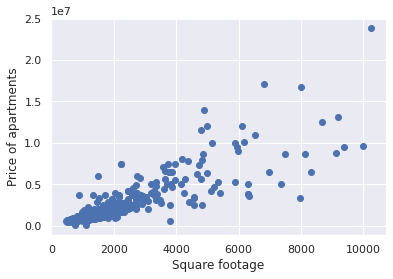

In [13]:
x = df['finishedsqft']
y = df['lastsoldprice']

plt.scatter(x, y)
plt.xlabel('Square footage')
plt.ylabel('Price of apartments')

Використовуємо пакет pairplot для візуалізації зв'язків

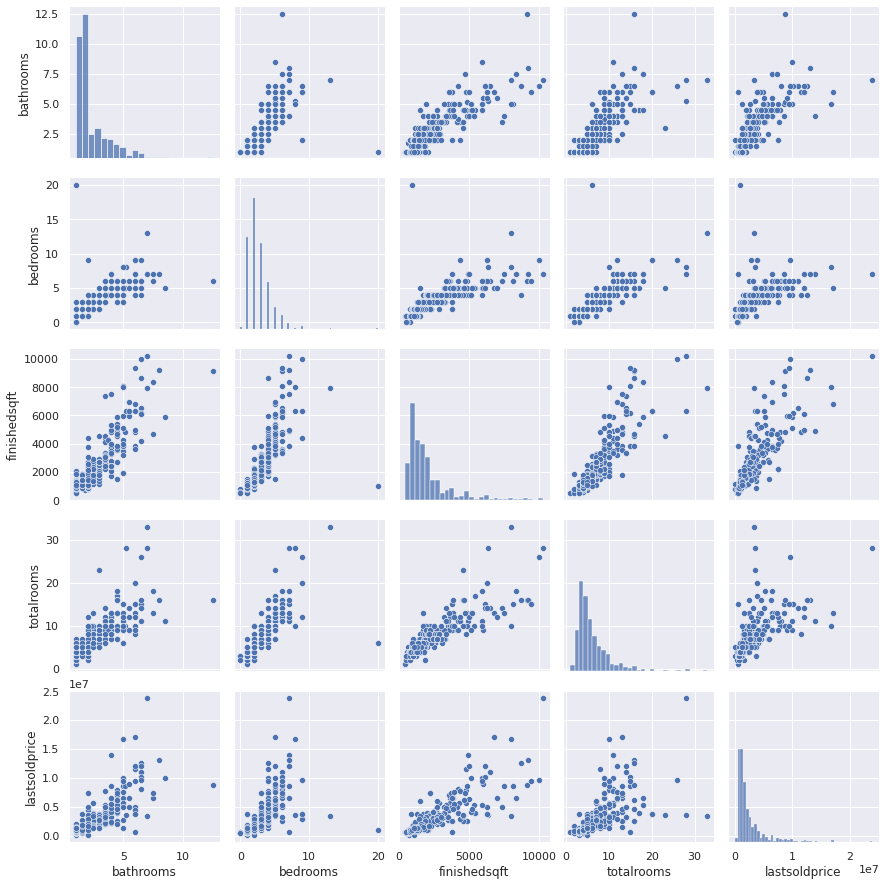

In [14]:
sns.pairplot(df[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'lastsoldprice']])

Між незалежною і залежною змінною існує лінійний зв’язок, тому можна розрахувати коефіцієнти поостої лінійної регресії k і b. Шукаємо залежність у вигляді y=kx+b.

In [15]:
from sklearn.linear_model import LinearRegression
x = df[['finishedsqft']]
y = df[['lastsoldprice']]
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [16]:
k = model.coef_[0][0]
b = model.intercept_[0]
print('y = ' + str(round(k,2)) + 'x + ' + str(round(b,2)))

y = 1342.33x + -356825.87


In [17]:
y_predict=model.predict(x)

Text(0, 0.5, 'Price of apartments')

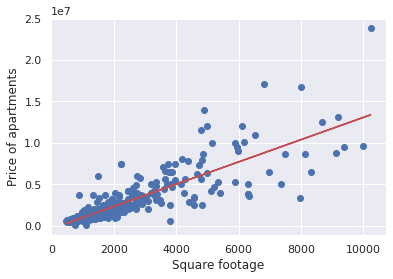

In [18]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.xlabel('Square footage')
plt.ylabel('Price of apartments')


Коефіцієнт детермінації R2 для простої моделі регресії

In [19]:
model.score(x, y)

0.7070524662549452

Множинна лінійна регресія

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df.drop('lastsoldprice', axis=1)
y = df['lastsoldprice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Коефіцієнт детермінації R2 для множинної моделі лінійної регресії

In [21]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.7448219529979705
0.7310610435642153


In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_train, y_train, cv=10).mean()

0.5420876222501466

Ви можете відносно легко реалізувати лінійну регресію в Python, використовуючи також пакет statsmodels. Як правило, це бажано, коли є потреба в більш детальних результатах.

In [23]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
model_new = sm.OLS(y_train, x_train)
results = model_new.fit()

In [25]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:          lastsoldprice   R-squared (uncentered):                   0.859
Model:                            OLS   Adj. R-squared (uncentered):              0.855
Method:                 Least Squares   F-statistic:                              222.5
Date:                Mon, 11 Apr 2022   Prob (F-statistic):                   5.75e-105
Time:                        07:46:41   Log-Likelihood:                         -4078.8
No. Observations:                 263   AIC:                                      8172.
Df Residuals:                     256   BIC:                                      8197.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [26]:
results.resid

168    323529.189453
365    -71293.010352
120    -37948.403320
296   -367757.477589
112   -550323.366712
           ...      
323   -413387.972439
192   -279429.924071
117   -157435.997690
47    -130675.831513
172    977343.927173
Length: 263, dtype: float64

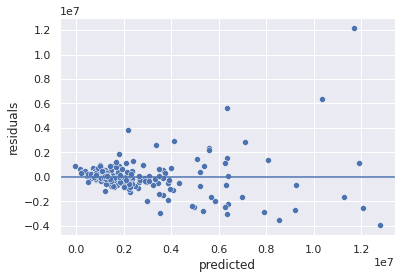

In [27]:
# create a DataFrame of predicted values and residuals
df["predicted"] = results.predict(x)
df["residuals"] = results.resid
sns.scatterplot(data=df, x="predicted", y="residuals")
plt.axhline(y=0)